### Time Series Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Date Range
date_range = pd.date_range(start="2021-01-01" , periods=60 , freq="ME") 

In [3]:
# Sales
sales = 200 + np.arange(60)*5 + np.random.normal(0,20,60)

In [4]:
data = {
    "Date":date_range,
    "Sales":sales
}

In [5]:
df = pd.DataFrame(data)

In [6]:
df.head()

,Date,Sales
0,2021-01-31,219.276812
1,2021-02-28,194.244074
2,2021-03-31,218.121427
3,2021-04-30,195.841600
4,2021-05-31,216.939077


In [7]:
df = df.set_index('Date')

In [8]:
df.head()

,Sales
Date,
2021-01-31,219.276812
2021-02-28,194.244074
2021-03-31,218.121427
2021-04-30,195.841600
2021-05-31,216.939077


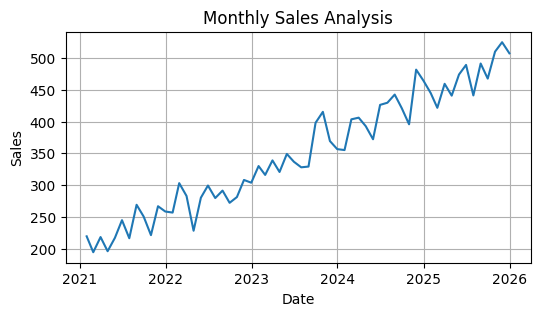

In [17]:
plt.figure(figsize=(6,3))
plt.plot(df , label='Sales')
plt.title("Monthly Sales Analysis")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [10]:
# !pip install statsmodels

In [11]:
# Time Series Component
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
decompose = seasonal_decompose( df['Sales'] , model="additive" )

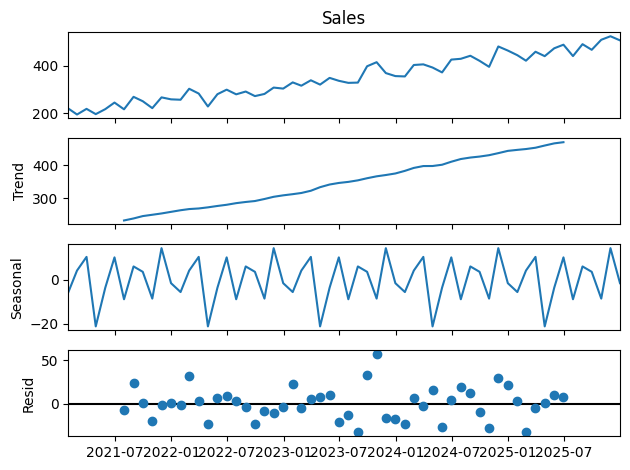

In [13]:
decompose.plot()
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

In [15]:
result = adfuller(df['Sales'])

In [16]:
# p-value
result[1]

np.float64(0.9901855717536551)

In [20]:
df['Sales_diff'] = df['Sales']-df['Sales'].shift(1)

In [21]:
df.head()

,Sales,Sales_diff
Date,,
2021-01-31,219.276812,NaN
2021-02-28,194.244074,-25.032739
2021-03-31,218.121427,23.877354
2021-04-30,195.841600,-22.279828
2021-05-31,216.939077,21.097477


In [22]:
df = df.dropna()

In [23]:
df.head()

,Sales,Sales_diff
Date,,
2021-02-28,194.244074,-25.032739
2021-03-31,218.121427,23.877354
2021-04-30,195.841600,-22.279828
2021-05-31,216.939077,21.097477
2021-06-30,244.712824,27.773748


In [24]:
df.shape

(59, 2)

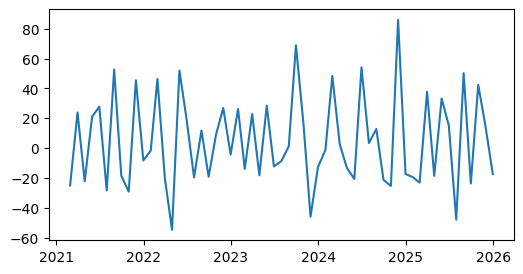

In [25]:
plt.figure(figsize=(6,3))
plt.plot(df['Sales_diff'])
plt.show()

In [26]:
# Train-Test-Split for Time Series
train = df.iloc[:-12]
test = df.iloc[-12:]

In [27]:
# model
from statsmodels.tsa.arima.model import ARIMA

In [28]:
model = ARIMA( train['Sales'] , order=(1,1,1) )

C:\Users\Croma Campus\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Croma Campus\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Croma Campus\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [29]:
# Train Model
model = model.fit()

In [30]:
forecast = model.forecast(steps=12) 

In [31]:
forecast

2025-01-31    454.966011
2025-02-28    454.027823
2025-03-31    453.935416
2025-04-30    453.926315
2025-05-31    453.925418
2025-06-30    453.925330
2025-07-31    453.925321
2025-08-31    453.925320
2025-09-30    453.925320
2025-10-31    453.925320
2025-11-30    453.925320
2025-12-31    453.925320
Freq: ME, Name: predicted_mean, dtype: float64

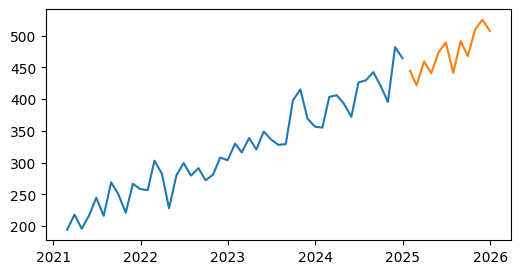

In [32]:
plt.figure(figsize=(6,3))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.show()

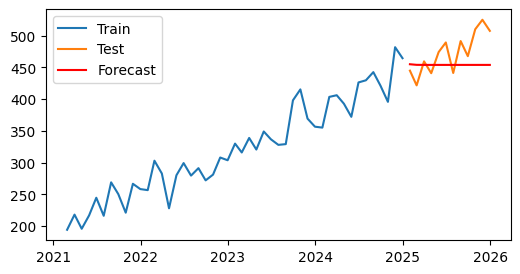

In [33]:
plt.figure(figsize=(6,3))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(test.index ,  forecast , label='Forecast' , color='red')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [35]:
mae = mean_absolute_error(test['Sales'],forecast)
rmse = np.sqrt( mean_squared_error(test['Sales'],forecast) )
print("MAE :",mae)
print("RMSE :",rmse)

MAE : 30.12695948010207
RMSE : 36.34405396682092
